In [4]:
QWERTY_LAYOUT = {
'row1': {
'keys': '`1234567890-=',
'positions': [
(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0),
(8, 0), (9, 0), (10, 0), (11, 0), (12, 0)
]
},
'row2': {
'keys': 'qwertyuiop[]\\',
'positions': [
(0.5, 1), (1.5, 1), (2.5, 1), (3.5, 1), (4.5, 1), (5.5, 1),
(6.5, 1), (7.5, 1), (8.5, 1), (9.5, 1), (10.5, 1), (11.5, 1),(12.5, 1)
]
},
'row3': {
'keys': 'asdfghjkl;\'',
'positions': [
(0.75, 2), (1.75, 2), (2.75, 2), (3.75, 2), (4.75, 2), (5.75,2), (6.75, 2), (7.75, 2), (8.75, 2), (9.75, 2), (10.75, 2)
]
},
'row4': {
'keys': 'zxcvbnm,./',
'positions': [
(1.25, 3), (2.25, 3), (3.25, 3), (4.25, 3), (5.25, 3), (6.25,3), (7.25, 3), (8.25, 3), (9.25, 3), (10.25, 3)
]
},
'special_keys': {
'Shift_L': (0, 3),
'Shift_R': (11.25, 3),
'Space': (3.5, 4),
'Backspace': (13, 0),
'Tab': (0, 1),
'CapsLock': (0, 2),
'Enter': (12, 2)
}
}
# Function to get key position
def get_key_position(key):
    for row in QWERTY_LAYOUT.values():
        if 'keys' in row and key in row['keys']:
            index = row['keys'].index(key)
            return row['positions'][index]
    return QWERTY_LAYOUT['special_keys'].get(key)
# Example usage
print(get_key_position('a')) # Output: (0.75, 2)
print(get_key_position('Shift_L')) # Output: (0, 3)


(0.75, 2)
(0, 3)


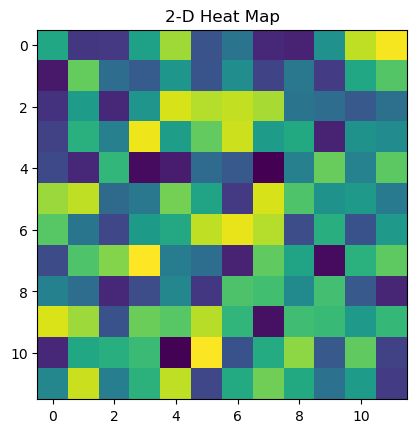

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
  
data = np.random.random(( 12 , 12 )) 
plt.imshow( data ) 
  
plt.title( "2-D Heat Map" ) 
plt.show()

In [7]:
text = input('Enter sample text: ')
dict_text_frequency = {}
for letter in text:
    if letter not in dict_text_frequency:
        dict_text_frequency[letter] = 1
    else:
        dict_text_frequency[letter] += 1
print(dict_text_frequency)

Enter sample text: hellooo
{'h': 1, 'e': 1, 'l': 2, 'o': 3}


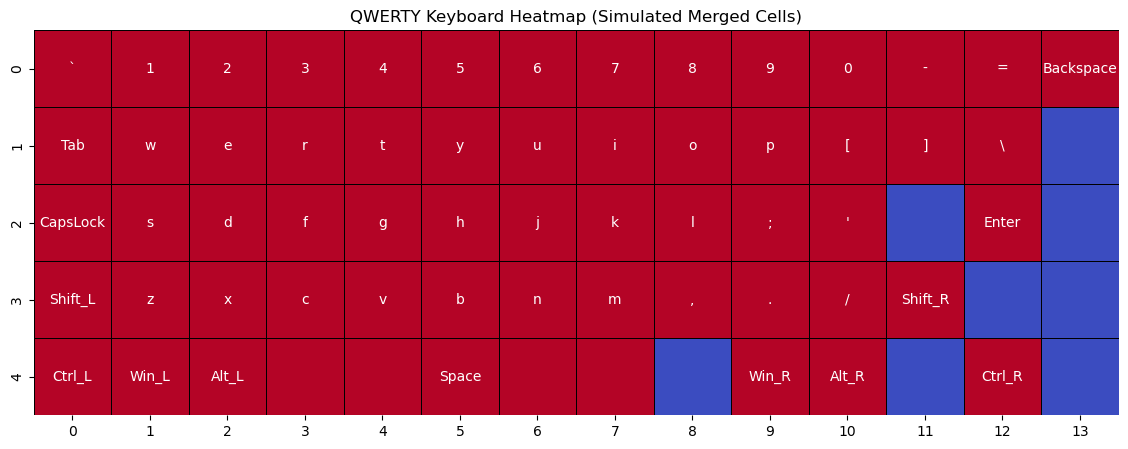

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# QWERTY layout dictionary with special keys included
QWERTY_LAYOUT = {
    'row1': {
        'keys': '`1234567890-=',
        'positions': [
            (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0),
            (8, 0), (9, 0), (10, 0), (11, 0), (12, 0)
        ]
    },
    'row2': {
        'keys': 'qwertyuiop[]\\',
        'positions': [
            (0.5, 1), (1.5, 1), (2.5, 1), (3.5, 1), (4.5, 1), (5.5, 1),
            (6.5, 1), (7.5, 1), (8.5, 1), (9.5, 1), (10.5, 1), (11.5, 1), (12.5, 1)
        ]
    },
    'row3': {
        'keys': 'asdfghjkl;\'',
        'positions': [
            (0.75, 2), (1.75, 2), (2.75, 2), (3.75, 2), (4.75, 2), (5.75, 2),
            (6.75, 2), (7.75, 2), (8.75, 2), (9.75, 2), (10.75, 2)
        ]
    },
    'row4': {
        'keys': 'zxcvbnm,./',
        'positions': [
            (1.25, 3), (2.25, 3), (3.25, 3), (4.25, 3), (5.25, 3), (6.25, 3),
            (7.25, 3), (8.25, 3), (9.25, 3), (10.25, 3)
        ]
    },
    'special_keys': {
        'Shift_L': (0, 3),
        'Shift_R': (11.75, 3),
        'Space': (3.5, 4),  # Centered space bar
        'Backspace': (13, 0),
        'Tab': (0, 1),
        'CapsLock': (0, 2),
        'Enter': (12.75, 2),
        'Ctrl_L': (0, 4),
        'Ctrl_R': (12, 4),
        'Alt_L': (2.5, 4),
        'Alt_R': (10.5, 4),
        'Win_L': (1.5, 4),
        'Win_R': (9.5, 4)
    }
}

# Initialize a blank grid for the heatmap (max x is 14 and max y is 5 based on the layout)
max_x = 14
max_y = 5
grid = np.zeros((max_y, max_x))

# Create an annotation grid for key labels
annotations = np.full((max_y, max_x), '', dtype=object)

# Assign a heatmap value (arbitrary value) for each key and fill the annotation grid
value = 1
for row in QWERTY_LAYOUT.values():
    if 'keys' in row:
        for key, pos in zip(row['keys'], row['positions']):
            x, y = int(pos[0]), int(pos[1])
            grid[y, x] = value  # Assign the value for the heatmap
            annotations[y, x] = key  # Place the key symbol in the annotation grid
    else:
        for key, pos in row.items():  # For special keys
            x, y = int(pos[0]), int(pos[1])
            if key == 'Space':  # Handle spacebar span (5 columns)
                grid[y, x:x+5] = value
                annotations[y, x:x+5] = [''] * 5  # Leave empty except for one cell
                annotations[y, x + 2] = 'Space'  # Annotate "Space" in the center cell
            else:
                grid[y, x] = value
                annotations[y, x] = key

# Create the heatmap
plt.figure(figsize=(14, 5))  # Adjust the figure size to make space for annotations
sns.heatmap(grid, annot=annotations, fmt='', cmap='coolwarm', cbar=False, linewidths=0.5, linecolor='black')

# Display the heatmap
plt.title('QWERTY Keyboard Heatmap (Simulated Merged Cells)')
plt.show()


Enter sample text: good morning have a nice day


C:\Users\lekha\AppData\Local\Temp\ipykernel_29372\435519320.py:128: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('inferno')
C:\Users\lekha\AppData\Local\Temp\ipykernel_29372\435519320.py:133: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x - w / 2, y - h / 2), w, h, fill=True, color=color, edgecolor='black', lw=1)


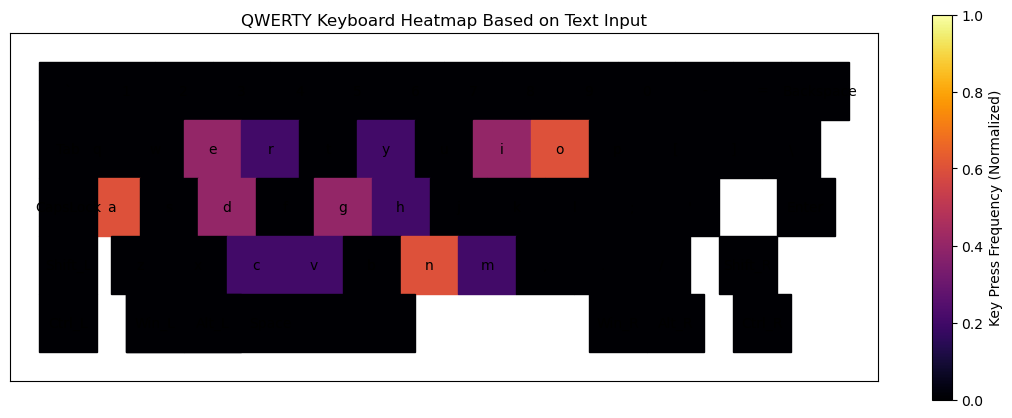

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# QWERTY layout dictionary with special keys included
QWERTY_LAYOUT = {
    'row1': {
        'keys': '`1234567890-=',
        'positions': [
            (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4),
            (8, 4), (9, 4), (10, 4), (11, 4), (12, 4)
        ],
        'widths': [1] * 13
    },
    'row2': {
        'keys': 'qwertyuiop[]\\',
        'positions': [
            (0.5, 3), (1.5, 3), (2.5, 3), (3.5, 3), (4.5, 3), (5.5, 3),
            (6.5, 3), (7.5, 3), (8.5, 3), (9.5, 3), (10.5, 3), (11.5, 3), (12.5, 3)
        ],
        'widths': [1] * 13
    },
    'row3': {
        'keys': 'asdfghjkl;\'',
        'positions': [
            (0.75, 2), (1.75, 2), (2.75, 2), (3.75, 2), (4.75, 2), (5.75, 2),
            (6.75, 2), (7.75, 2), (8.75, 2), (9.75, 2), (10.75, 2)
        ],
        'widths': [1] * 11
    },
    'row4': {
        'keys': 'zxcvbnm,./',
        'positions': [
            (1.25, 1), (2.25, 1), (3.25, 1), (4.25, 1), (5.25, 1), (6.25, 1),
            (7.25, 1), (8.25, 1), (9.25, 1), (10.25, 1)
        ],
        'widths': [1] * 10
    },
    'special_keys': {
        'Shift_L': (0, 1),
        'Shift_R': (11.75, 1),
        'Space': (3.5, 0),  # Centered space bar
        'Backspace': (13, 4),
        'Tab': (0, 3),
        'CapsLock': (0, 2),
        'Enter': (12.75, 2),
        'Ctrl_L': (0, 0),
        'Ctrl_R': (12, 0),
        'Alt_L': (2.5, 0),
        'Alt_R': (10.5, 0),
        'Win_L': (1.5, 0),
        'Win_R': (9.5, 0)
    }
}

# Define left and right side letters for determining Shift keys
LEFT_SIDE_LETTERS = set('qwertasdfgzxcvb')
RIGHT_SIDE_LETTERS = set('yuiophjklnm')

# Take user input and calculate letter frequencies
text = input('Enter sample text: ')
dict_text_frequency = {}
for letter in text:
    # Check for uppercase letters and assign Shift key frequency
    if letter.isupper():
        if letter.lower() in LEFT_SIDE_LETTERS:
            dict_text_frequency['Shift_R'] = dict_text_frequency.get('Shift_R', 0) + 1
        elif letter.lower() in RIGHT_SIDE_LETTERS:
            dict_text_frequency['Shift_L'] = dict_text_frequency.get('Shift_L', 0) + 1
        letter = letter.lower()  # Handle uppercase letter as lowercase for key frequency
    
    # Update frequency of each letter
    if letter not in dict_text_frequency:
        dict_text_frequency[letter] = 1
    else:
        dict_text_frequency[letter] += 1

# Normalize frequencies for heatmap purposes
max_frequency = max(dict_text_frequency.values()) if dict_text_frequency else 1

# Example heatmap data for each key
heatmap_data = {}
for row in QWERTY_LAYOUT.values():
    if 'keys' in row:
        for key in row['keys']:
            heatmap_data[key] = dict_text_frequency.get(key, 0) / max_frequency
    else:
        for key in row.keys():  # For special keys
            heatmap_data[key] = dict_text_frequency.get(key, 0) / max_frequency

# Initialize a blank grid for the heatmap
positions = []
widths = []
heights = []
annotations = []
heatmap_values = []

# Extract data for plotting
for row in QWERTY_LAYOUT.values():
    if 'keys' in row:
        for key, pos, width in zip(row['keys'], row['positions'], row['widths']):
            x, y = pos
            positions.append((x, y))  # Position of the key
            widths.append(width)  # Width of the box
            heights.append(1)  # Height of each key is constant
            annotations.append(key)
            heatmap_values.append(heatmap_data.get(key, 0))
    else:
        for key, pos in row.items():  # For special keys
            x, y = pos
            if key == 'Space':  # Handle spacebar span (5 columns)
                positions.append((x, y))
                widths.append(5)
                heights.append(1)
                annotations.append('Space')
                heatmap_values.append(heatmap_data.get(key, 0))
            else:
                positions.append((x, y))
                widths.append(1)
                heights.append(1)
                annotations.append(key)
                heatmap_values.append(heatmap_data.get(key, 0))

# Create the plot
fig, ax = plt.subplots(figsize=(14, 5))

# Define a colormap (for example, `inferno`)
cmap = cm.get_cmap('inferno')

# Create the boxes with heatmap color
for (x, y), w, h, label, value in zip(positions, widths, heights, annotations, heatmap_values):
    color = cmap(value)  # Get color based on the heatmap value
    rect = plt.Rectangle((x - w / 2, y - h / 2), w, h, fill=True, color=color, edgecolor='black', lw=1)
    ax.add_patch(rect)
    plt.text(x, y, label, ha='center', va='center', fontsize=10)

# Add a colorbar to indicate the intensity scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Key Press Frequency (Normalized)')

# Set limits and gridlines
ax.set_xlim(-1, 14)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.grid(False)
plt.xticks([])
plt.yticks([])

# Display the heatmap
plt.title('QWERTY Keyboard Heatmap Based on Text Input')
plt.show()
